The dataset for this test contains bank transaction information. Some of these transactions were fraudulent. The transaction data has been anonymised to protect the true transaction information. Your objective is to build a machine learning model that can classify bank transactions as fraudulent or not fraudulent

**1.** Import the <i>Transactions.csv</i> dataset into a Pandas dataframe called <i>Trans</i>. Keep all the columns. The feature columns V1 - V28 contains transaction data that has been anonymised to protect the true transaction information.

[1 Mark]

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Trans = pd.read_csv('Transactions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Transactions.csv'

**2.** Summarize the dataset by:
* Getting the dimentions of the dataset
* Taking a peak at the content of the dataset.
* Displaying the data types for all the columns.
* Generating a statistical summary for the Time and Amount features.
* Determining if there is a correlation between the column data.

[7 Marks]

In [62]:
print('There are ' + str(Trans.shape[0]) + ' rows and ' + str(Trans.shape[1]) +' columns.')

There are 284807 rows and 31 columns.


In [63]:
Trans.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
Trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [65]:
Trans.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [66]:
corr = Trans.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5, 1, 'Heatmap of Correlation')

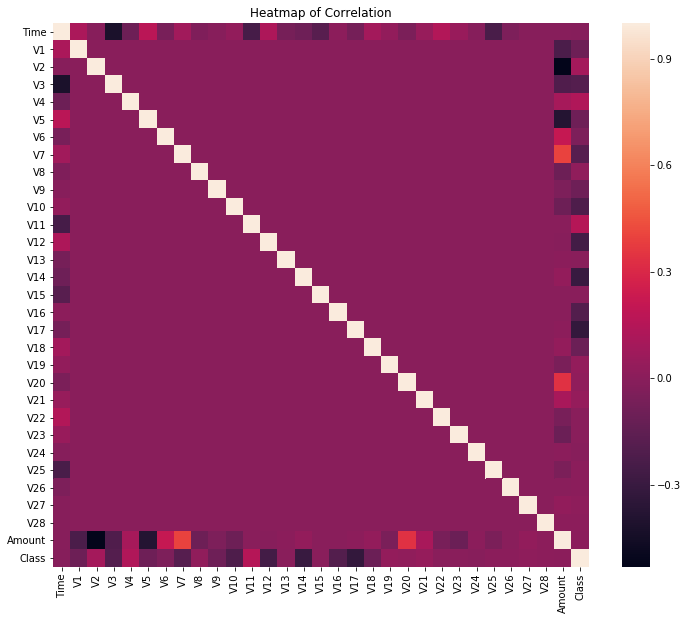

In [67]:
import seaborn as sns
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

**3.** Visualize the dataset by:
* Creating histograms to show the counts for the Time, Amount and Class features.

[3 Marks]

(array([ 3889.,  2188.,  1473.,  1863.,  1097.,  1487.,  1649.,  2595.,
         4290.,  6934.,  7745.,  8135.,  8057.,  7021.,  7568.,  7833.,
         7167.,  7603.,  7615.,  8332.,  7696.,  8734., 10055.,  7936.,
         5822.,  3637.,  1996.,  1627.,  1779.,  1106.,  1118.,  1847.,
         3375.,  4273.,  6548.,  8078.,  8037.,  7809.,  7335.,  7692.,
         8296.,  8284.,  8310.,  7814.,  8075.,  7305.,  7508.,  7532.,
         5964.,  4678.]),
 array([     0.  ,   3455.84,   6911.68,  10367.52,  13823.36,  17279.2 ,
         20735.04,  24190.88,  27646.72,  31102.56,  34558.4 ,  38014.24,
         41470.08,  44925.92,  48381.76,  51837.6 ,  55293.44,  58749.28,
         62205.12,  65660.96,  69116.8 ,  72572.64,  76028.48,  79484.32,
         82940.16,  86396.  ,  89851.84,  93307.68,  96763.52, 100219.36,
        103675.2 , 107131.04, 110586.88, 114042.72, 117498.56, 120954.4 ,
        124410.24, 127866.08, 131321.92, 134777.76, 138233.6 , 141689.44,
        145145.28, 14860

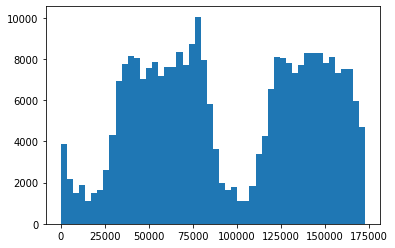

In [68]:
plt.hist(Trans.Time, bins = 50)

(array([2.75992e+05, 6.01000e+03, 1.53900e+03, 6.27000e+02, 2.27000e+02,
        1.44000e+02, 9.20000e+01, 6.90000e+01, 3.30000e+01, 2.20000e+01,
        1.00000e+01, 1.10000e+01, 5.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.    ,   513.8232,  1027.6464,  1541.4696,  2055.2928,
         2569.116 ,  3082.9392,  3596.7624,  4110.5856,  4624.4088,
         5138.232 ,  5652.0552,  6165.8784,  6679.7016,  7193.5248,
         7707.348 ,  8221.1712,  8734.9944,  9248.8176,  9762.64

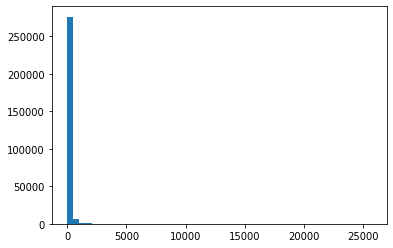

In [69]:
plt.hist(Trans.Amount, bins = 50)

(array([284315.,    492.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

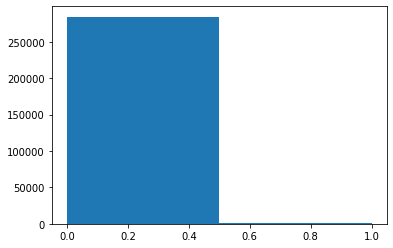

In [70]:
plt.hist(Trans.Class, bins = 2)

**4.** Determine the number of fraudulent vs. non-fraudulent transactions.
* Visualize this by drawing a Pie Chart that shows the percentage of fraudulent vs. non-fraudulent transactions.
* The percentages displayed on the Pie Chart should be rounded to 3 decimals.

[7 Marks]

In [71]:
no_fraud = Trans[Trans.Class == 0].Class.count()
print(no_fraud)

284315


In [72]:
fraud = Trans[Trans.Class == 1].Class.count()
print(fraud)

492


In [73]:
total = Trans.Class.count()
print(total)

284807


In [74]:
no_fraud_percent = no_fraud / total * 100
print('{:.3f}%'.format(no_fraud_percent))

99.827%


In [75]:
fraud_percent = fraud / total * 100
print('{:.3f}%'.format(fraud_percent))

0.173%


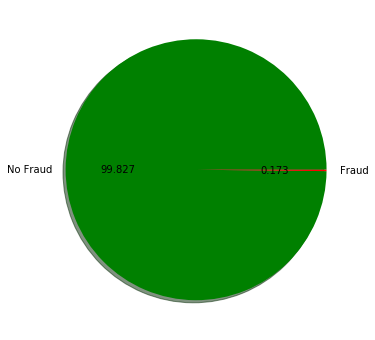

In [76]:
plt.pie([no_fraud, fraud], labels=['No Fraud','Fraud'], colors=['g','r'], shadow = True, autopct = '%.3f' )
fig = plt.gcf()
fig.set_size_inches(6, 6)

**5.** As can be seen from the Pie Chart, there is only a small number of fraudulent transactions when compared to non-fraudulent transactions. This could lead to a biased model if all the data is used for training. To create an unbiased model you have to do the following:
* Randomly select a training dataset and testing dataset from the original dataset.
* The testing dataset should make up 10% of the original samples, while the rest is used for training data.
* The training data should contain an equal number of fraudulent and non-fraudulent samples to avoid a biased model.
* In other words in the end the final training data sould consist of only a sample of the original training data with equal amounts of fraudulent and non-fraudulent data.

[13 Marks]

In [77]:
perm = np.random.permutation(len(Trans))
split_percentage = 0.9
split_point = int(np.ceil(Trans.shape[0]*split_percentage))

train = Trans.loc[perm[:split_point].ravel()].sort_index()
test = Trans.loc[perm[split_point:].ravel()].sort_index()
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 453 fraudulent transactions in the train data.


In [78]:
train_non_fraud = train[train['Class'] == 0]
train_fraud = train[train['Class'] == 1]
train_non_fraud = train_non_fraud.sample(no_of_frauds)
train_non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223223,153742.0,-0.359078,0.954214,0.977088,1.059283,0.684177,0.397606,0.690282,0.127445,0.150612,...,-0.322870,-0.486062,-0.148970,0.559491,0.052410,-0.661009,0.439082,0.224996,5.00,0
171906,129042.0,1.899414,-0.388411,-0.372966,0.399211,-0.690229,-0.768232,-0.353270,-0.196058,1.200981,...,0.270763,0.926179,0.067488,0.082243,-0.044137,-0.573719,0.057572,-0.021310,55.00,0
69171,56784.0,1.008928,-1.052308,0.408750,-1.484891,-0.931654,0.297147,-0.747353,0.274673,1.800742,...,0.211240,0.587501,-0.267986,-0.591090,0.412288,0.158371,0.031441,0.021881,120.00,0
11862,23162.0,-15.031005,8.540670,-14.293003,2.641891,-9.358972,-3.028992,-6.293532,9.703019,1.349445,...,-0.145231,-1.549665,-0.559017,0.389021,0.762618,-0.417935,-0.277853,-0.363391,89.99,0
114889,78421.0,1.151013,-0.031538,0.634935,0.708081,-0.440601,-0.176576,-0.139368,0.001963,0.453751,...,-0.258161,-0.553964,0.089490,0.125860,0.254388,0.311943,-0.006462,0.016403,24.11,0
254651,171258.0,-1.458649,2.085297,-1.032399,-0.160631,-0.838964,-1.854241,0.049007,0.918142,-0.317358,...,0.508657,1.509435,0.144405,0.924247,-0.725554,-0.258728,0.361133,0.254085,7.99,0
189028,137789.0,2.226116,-1.461799,-0.533066,-1.585493,-1.381744,-0.321796,-1.329606,-0.102243,-1.083692,...,-0.392100,-0.718384,0.453710,0.611427,-0.562055,-0.518012,0.032195,-0.022252,43.16,0
178031,132163.0,-1.013775,0.788892,1.252478,-0.819069,-0.214586,-0.364450,0.387139,0.049105,0.779052,...,0.183247,1.042945,-0.154429,0.005936,-0.208579,0.724180,0.600865,0.378774,35.35,0
32668,38480.0,0.756040,-2.129787,0.454839,-0.524775,-1.327775,1.378662,-1.160901,0.344850,0.317093,...,0.311129,0.372516,-0.594588,-1.312747,0.511858,-0.017853,0.006885,0.058229,339.91,0
217693,151198.0,1.801488,-0.566308,-0.752885,1.041108,-0.144464,0.483807,-0.537750,0.193849,0.822482,...,0.258797,0.631426,-0.075942,-1.188929,-0.048676,-0.515968,0.032316,-0.036805,100.00,0


In [79]:
trans_sample = pd.concat([train_non_fraud, train_fraud])
trans_sample.shape

(906, 31)

In [80]:
trans_sample.reset_index(drop = True, inplace = True)
trans_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,153742.0,-0.359078,0.954214,0.977088,1.059283,0.684177,0.397606,0.690282,0.127445,0.150612,...,-0.322870,-0.486062,-0.148970,0.559491,0.052410,-0.661009,0.439082,0.224996,5.00,0
1,129042.0,1.899414,-0.388411,-0.372966,0.399211,-0.690229,-0.768232,-0.353270,-0.196058,1.200981,...,0.270763,0.926179,0.067488,0.082243,-0.044137,-0.573719,0.057572,-0.021310,55.00,0
2,56784.0,1.008928,-1.052308,0.408750,-1.484891,-0.931654,0.297147,-0.747353,0.274673,1.800742,...,0.211240,0.587501,-0.267986,-0.591090,0.412288,0.158371,0.031441,0.021881,120.00,0
3,23162.0,-15.031005,8.540670,-14.293003,2.641891,-9.358972,-3.028992,-6.293532,9.703019,1.349445,...,-0.145231,-1.549665,-0.559017,0.389021,0.762618,-0.417935,-0.277853,-0.363391,89.99,0
4,78421.0,1.151013,-0.031538,0.634935,0.708081,-0.440601,-0.176576,-0.139368,0.001963,0.453751,...,-0.258161,-0.553964,0.089490,0.125860,0.254388,0.311943,-0.006462,0.016403,24.11,0
5,171258.0,-1.458649,2.085297,-1.032399,-0.160631,-0.838964,-1.854241,0.049007,0.918142,-0.317358,...,0.508657,1.509435,0.144405,0.924247,-0.725554,-0.258728,0.361133,0.254085,7.99,0
6,137789.0,2.226116,-1.461799,-0.533066,-1.585493,-1.381744,-0.321796,-1.329606,-0.102243,-1.083692,...,-0.392100,-0.718384,0.453710,0.611427,-0.562055,-0.518012,0.032195,-0.022252,43.16,0
7,132163.0,-1.013775,0.788892,1.252478,-0.819069,-0.214586,-0.364450,0.387139,0.049105,0.779052,...,0.183247,1.042945,-0.154429,0.005936,-0.208579,0.724180,0.600865,0.378774,35.35,0
8,38480.0,0.756040,-2.129787,0.454839,-0.524775,-1.327775,1.378662,-1.160901,0.344850,0.317093,...,0.311129,0.372516,-0.594588,-1.312747,0.511858,-0.017853,0.006885,0.058229,339.91,0
9,151198.0,1.801488,-0.566308,-0.752885,1.041108,-0.144464,0.483807,-0.537750,0.193849,0.822482,...,0.258797,0.631426,-0.075942,-1.188929,-0.048676,-0.515968,0.032316,-0.036805,100.00,0


**6.** Create another Pie Chart to illustrate the percentage of fraudulent vs. non-fraudulent transactions within the training dataset.
* The percentages should be equal to 50% each.
* The percentages displayed on the Pie Chart should be rounded to 3 decimals.

[4 Marks]

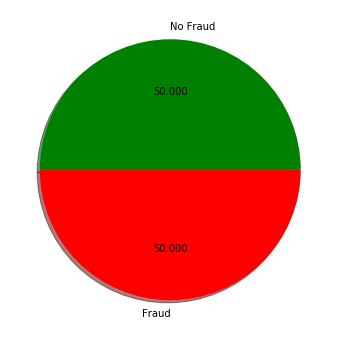

In [81]:
non_fraud = trans_sample[trans_sample.Class == 0].Class.count()
fraud = trans_sample[trans_sample.Class == 1].Class.count()
total = trans_sample.Class.count()

plt.pie([non_fraud, fraud], labels=['No Fraud','Fraud'],colors=['g','r'],shadow=True,autopct ='%.3f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

**7.** Determine which of the data columns correlate with the Class column.
* Use 0.5 as the correlation coefficient to determine correlation.
* Look at positive and negative correlation.
* List the columns that shows a positive or negative correlation of 0.5 and more with Class.

[3 Marks]

In [82]:
corr = trans_sample.corr()
corr = corr[['Class']]
corr

,Class
Time,-0.156605
V1,-0.434062
V2,0.481518
V3,-0.567058
V4,0.717779
V5,-0.374215
V6,-0.383933
V7,-0.476163
V8,0.042670
V9,-0.570224


In [83]:
corr[corr.Class < -0.5]

,Class
V3,-0.567058
V9,-0.570224
V10,-0.629267
V12,-0.680138
V14,-0.749360
V16,-0.592250
V17,-0.560752


In [84]:
corr[corr.Class > 0.5]

,Class
V4,0.717779
V11,0.690029
Class,1.000000


**8.** Create box plots between the Class and each of the columns that showed correlation (positive or negative) with Class.

[7 Marks]

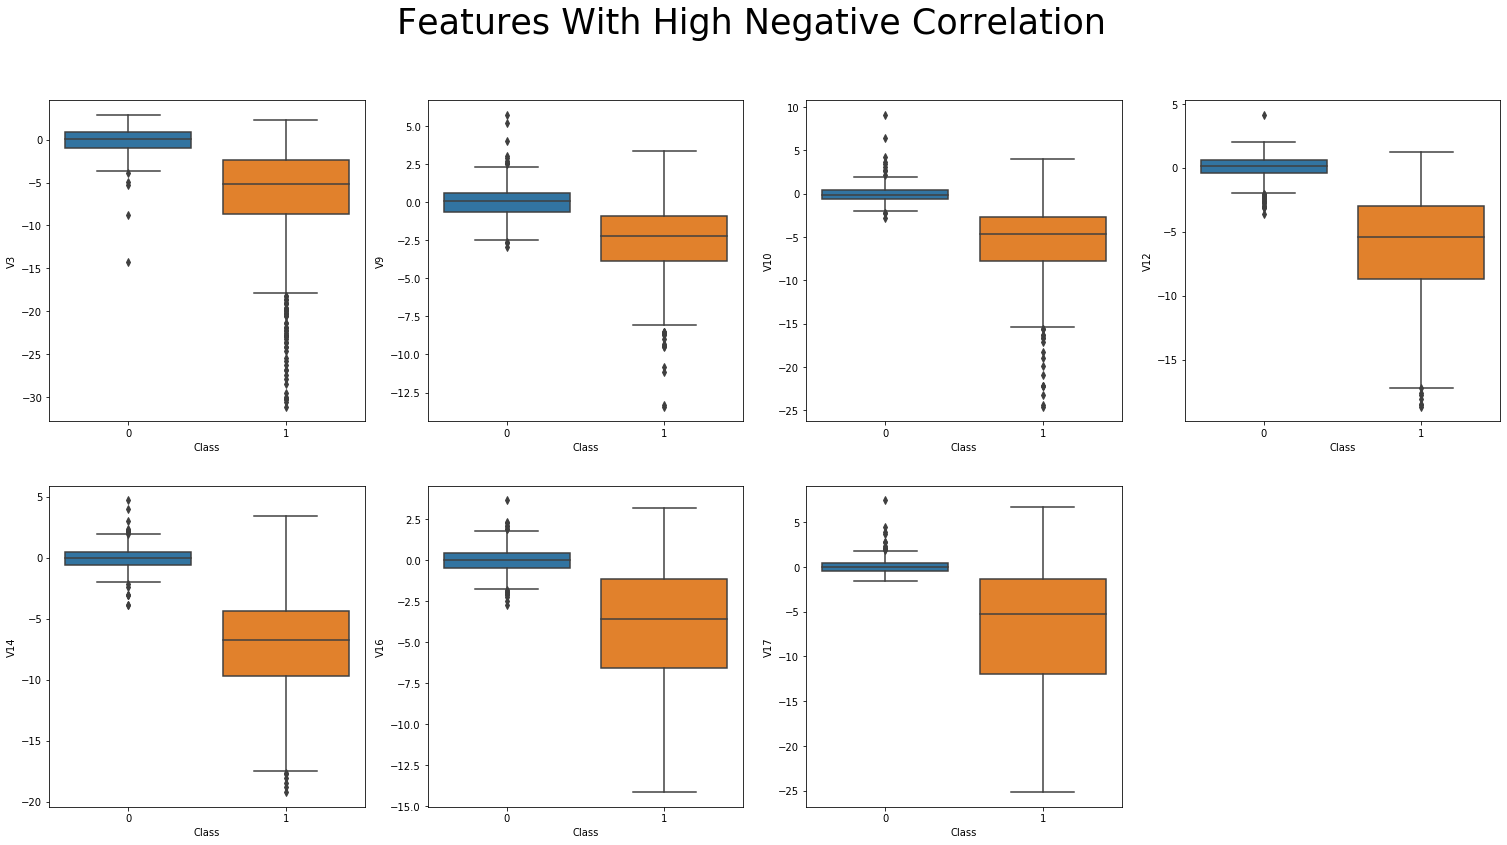

In [85]:
f, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (26,13))

f.suptitle('Features With High Negative Correlation', size = 35)
sns.boxplot(x = "Class", y = "V3", data = trans_sample, ax = axes[0,0])
sns.boxplot(x = "Class", y = "V9", data = trans_sample, ax = axes[0,1])
sns.boxplot(x = "Class", y = "V10", data = trans_sample, ax = axes[0,2])
sns.boxplot(x = "Class", y =  "V12", data = trans_sample, ax = axes[0,3])
sns.boxplot(x = "Class", y = "V14", data = trans_sample, ax = axes[1,0])
sns.boxplot(x = "Class", y = "V16", data = trans_sample, ax = axes[1,1])
sns.boxplot(x = "Class", y = "V17", data = trans_sample, ax = axes[1,2])
f.delaxes(axes[1,3])

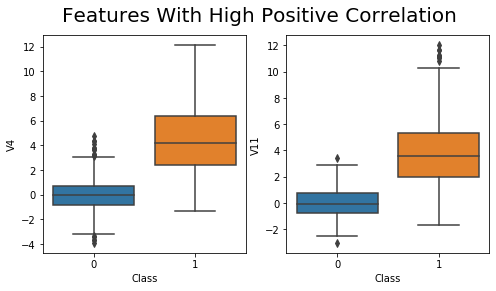

In [86]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

f.suptitle('Features With High Positive Correlation', size = 20)
sns.boxplot(x = "Class", y = "V4", data = trans_sample, ax = axes[0])
sns.boxplot(x = "Class", y = "V11", data = trans_sample, ax = axes[1])

**9.** Remove outliers.
* Remove outliers that are 2.5 times the variance or more outside the 1st and 3rd quantiles.

[5 Marks]

In [87]:
Q1 = trans_sample.quantile(0.25)
Q3 = trans_sample.quantile(0.75)
IQR = trans_sample.var()

sample = trans_sample[~((trans_sample < (Q1 - 2.5 * IQR)) | (trans_sample > (Q3 + 2.5 * IQR))).any(axis = 1)]
sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,153742.0,-0.359078,0.954214,0.977088,1.059283,0.684177,0.397606,0.690282,0.127445,0.150612,...,-0.322870,-0.486062,-0.148970,0.559491,0.052410,-0.661009,0.439082,0.224996,5.00,0
1,129042.0,1.899414,-0.388411,-0.372966,0.399211,-0.690229,-0.768232,-0.353270,-0.196058,1.200981,...,0.270763,0.926179,0.067488,0.082243,-0.044137,-0.573719,0.057572,-0.021310,55.00,0
2,56784.0,1.008928,-1.052308,0.408750,-1.484891,-0.931654,0.297147,-0.747353,0.274673,1.800742,...,0.211240,0.587501,-0.267986,-0.591090,0.412288,0.158371,0.031441,0.021881,120.00,0
3,23162.0,-15.031005,8.540670,-14.293003,2.641891,-9.358972,-3.028992,-6.293532,9.703019,1.349445,...,-0.145231,-1.549665,-0.559017,0.389021,0.762618,-0.417935,-0.277853,-0.363391,89.99,0
4,78421.0,1.151013,-0.031538,0.634935,0.708081,-0.440601,-0.176576,-0.139368,0.001963,0.453751,...,-0.258161,-0.553964,0.089490,0.125860,0.254388,0.311943,-0.006462,0.016403,24.11,0
5,171258.0,-1.458649,2.085297,-1.032399,-0.160631,-0.838964,-1.854241,0.049007,0.918142,-0.317358,...,0.508657,1.509435,0.144405,0.924247,-0.725554,-0.258728,0.361133,0.254085,7.99,0
6,137789.0,2.226116,-1.461799,-0.533066,-1.585493,-1.381744,-0.321796,-1.329606,-0.102243,-1.083692,...,-0.392100,-0.718384,0.453710,0.611427,-0.562055,-0.518012,0.032195,-0.022252,43.16,0
7,132163.0,-1.013775,0.788892,1.252478,-0.819069,-0.214586,-0.364450,0.387139,0.049105,0.779052,...,0.183247,1.042945,-0.154429,0.005936,-0.208579,0.724180,0.600865,0.378774,35.35,0
9,151198.0,1.801488,-0.566308,-0.752885,1.041108,-0.144464,0.483807,-0.537750,0.193849,0.822482,...,0.258797,0.631426,-0.075942,-1.188929,-0.048676,-0.515968,0.032316,-0.036805,100.00,0
12,47547.0,-0.290800,1.453134,0.713968,0.693350,0.832332,-0.631937,0.951693,-0.102861,-0.856376,...,0.047712,0.268257,-0.267934,-0.028555,0.223814,-0.342674,0.086838,0.062923,1.00,0


**10.** Extract the X and y matrix from the dataset that will be used to train the model. Use column Class as the lable column.

[2 Marks]

In [88]:
X = sample.drop('Class', axis=1)
y = sample['Class']

**11.** Determine the dimensions of the X and y matrix.

[2 Marks]

In [89]:
print(X.shape)
print(y.shape)

(680, 30)
(680,)


**12.** Train 4 classifiers and determine which classifier is the bests by comparing their accuracies.
* Train the following classifiers:
    - Logistic regression
    - K nearest neighbor
    - Decision tree
    - Support vector machines
* Determine the best model by using k-fold cross-validation.
    - Set K = 20 for the k-fold cross-validation
    - Report the accuracy and F1 scores
 
[16 Marks]

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metric import make_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models
f1= make_scorer(f1_score,average='Weighted')
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=20, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR(acc): 0.920767 (0.052513)
LR(f1): 0.908304 (0.060490)
KNN(acc): 0.643519 (0.052404)
KNN(f1): 0.604320 (0.066832)
CART(acc): 0.895172 (0.055312)
CART(f1): 0.877858 (0.062775)
SVM(acc): 0.556878 (0.076168)


/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cla

SVM(f1): 0.055563 (0.096809)


/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jaco/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


**13.** Create box plots to compare the above classifiers' F1 scores to determine which classifier performed the best.

[4 Marks]

/home/jaco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


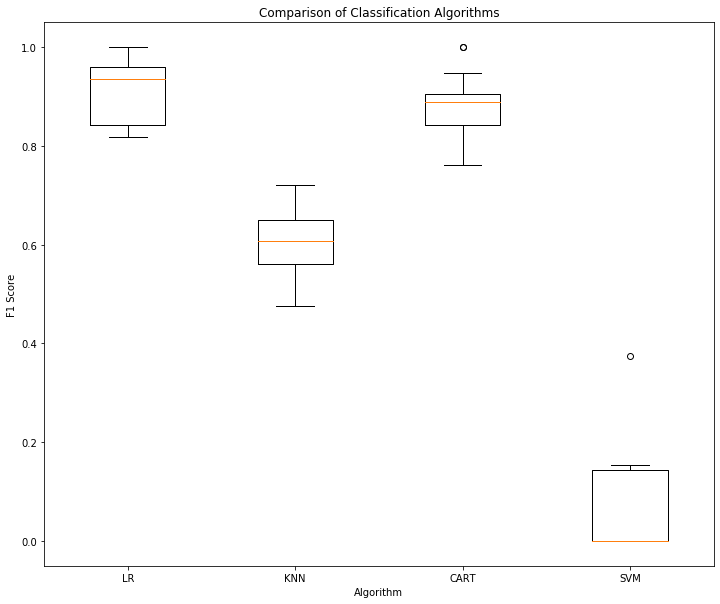

In [91]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')

#values=np.arange(0,10)
#print(values[1::2])

plt.boxplot(results[1::2])
ax = fig.add_subplot(111)
ax.set_xticklabels(names[1::2])
plt.show()

**14.** Select the model that produced the the highest F1 score to do the following:
* Make predictions using the X_test matrix
* Provide the accuracy score, confusion matrix and classification report of the model.

[6 Marks]

In [92]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [94]:
# Evaluate predictions
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9338235294117647
[[91  1]
 [ 8 36]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        92
           1       0.97      0.82      0.89        44

    accuracy                           0.93       136
   macro avg       0.95      0.90      0.92       136
weighted avg       0.94      0.93      0.93       136



**15.** Explain the confusion matrix and classification report results with regard to the following:
* What does the precision score mean?
* What does the recall score mean?
* What does the F1 score mean?
* Are the FN and FP values of the confusion matrix exceptable?

[5 Marks]

Precision indicates what percentage of the predictions (fraudulent or non-fraudulent) were predicted correctly. In this case 92% of the non-fraudulent transactions were predicted as non-fraudulent transactions, while 97% of the fraudulent transactions were predicted as fraudulent transactions.

The recall score is an indication of the ability of the classifier to find all the fraudulent and non-fraudulent samples. In this case the ability of the classifier to find all non-fraudulent transactions is 99%, while the ability of the classifier to find all fraudulent transactions is 82%.

F1 score is the weighted average of the precision and recall scores.

The FN and FP values are exceptable, because they are small.

**16.** BONUS MARKS: Use a dummy classifier as a baseline to compare your selected classifier's accuracy score, confusion matrix and classification report with.
* Go to https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummyclassifier for info about a dummy classifier.

[4 Marks]

In [98]:
# Make predictions with Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
predictions = dummy.predict(X_test)

In [99]:
# Evaluate Dummy Classifier predictions
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.4852941176470588
[[46 46]
 [24 20]]
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        92
           1       0.30      0.45      0.36        44

    accuracy                           0.49       136
   macro avg       0.48      0.48      0.47       136
weighted avg       0.54      0.49      0.50       136

